# Nb-20180308-1845-BollingerBands

Implement Bollinger Bands: 
- https://www.investopedia.com/articles/technical/102201.asp

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [3]:
import finance as fat

In [4]:
# Change the plot size.
plt.rcParams['figure.figsize'] = [18.0, 10.0]

In [19]:
df = fat.get_price_data('MSFT')

Loaded data for MSFT: 1986-03-13 to 2018-03-07.


In [ ]:
def add_bollinger_bands(data_frame, column, period, inplace=False) :
    df = fat.use_data_frame_if_inplace(data_frame, inplace)    

In [38]:
d = df
column = 'Close'
period = 20

In [39]:
ma = fat.add_sma_column(d, column, period, inplace=True)[f'{column} SMA{period}']
msd = pd.Series(d[column]).rolling(window=period, center=False).std()

In [44]:
d[f'{column} BBandHi{period}'] = ma + (2 * msd)
d[f'{column} BBandLo{period}'] = ma - (2 * msd)
d.tail()

,Open,High,Low,Close,Adj Close,Volume,Close SMA20,B1-20,Close BBandHi20,Close BBandLo20
Date,,,,,,,,,,
2018-03-01,93.989998,94.570000,91.839996,92.849998,92.849998,37135600,91.4420,96.568329,96.568329,86.315670
2018-03-02,91.580002,93.150002,90.860001,93.050003,93.050003,32830400,91.3815,96.395119,96.395119,86.367881
2018-03-05,92.339996,94.269997,92.260002,93.639999,93.639999,23901600,91.4745,96.587267,96.587267,86.361733
2018-03-06,94.339996,94.489998,92.940002,93.320000,93.320000,22175800,91.7405,96.641315,96.641315,86.839685
2018-03-07,93.160004,93.940002,92.430000,93.860001,93.860001,26092800,91.8670,96.853068,96.853068,86.880932


In [45]:
overlay = pd.DataFrame(d, columns=['Close SMA20', 'Close BBandHi20', 'Close BBandLo20'])

overlay.tail()

,Close SMA20,Close BBandHi20,Close BBandLo20
Date,,,
2018-03-01,91.4420,96.568329,86.315670
2018-03-02,91.3815,96.395119,86.367881
2018-03-05,91.4745,96.587267,86.361733
2018-03-06,91.7405,96.641315,86.839685
2018-03-07,91.8670,96.853068,86.880932


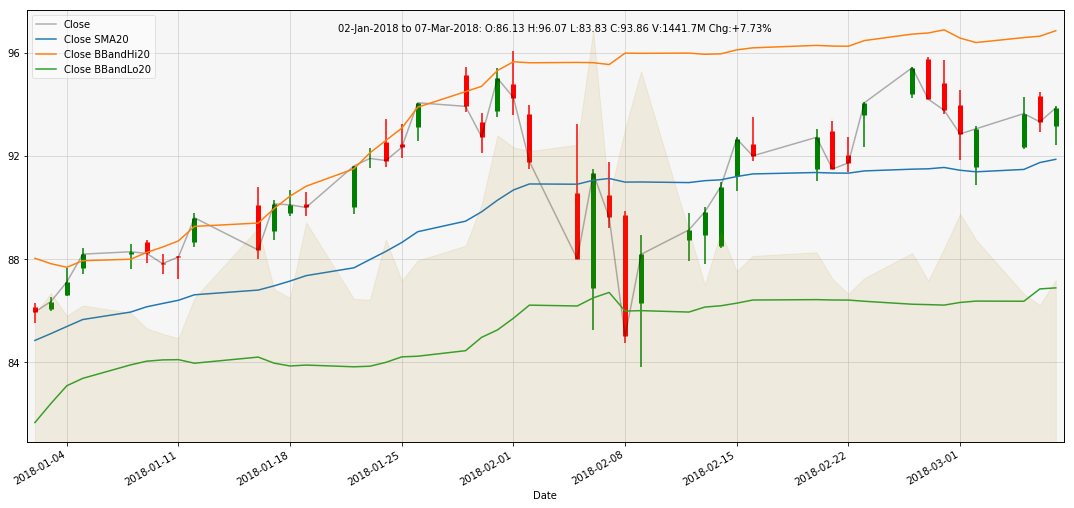

In [46]:
fat.plot_daily_ticker(df['2018'], overlay=overlay)